# 27.7 - Neural Networks Challenge

I use RBM's (Restricted Boltzman Machines) to extract components from a Japanese character image data set. I mess around with the parameters, increasing the number of components and decreasing the learning rate over the course of 3 examples (only the first 20 components are shown for each example).

I also use convlution filters, which is usually the first stage in a convolutional neural networks, to filter for characteristics we care about.

The following code loads teh data and displays the first 10 images.

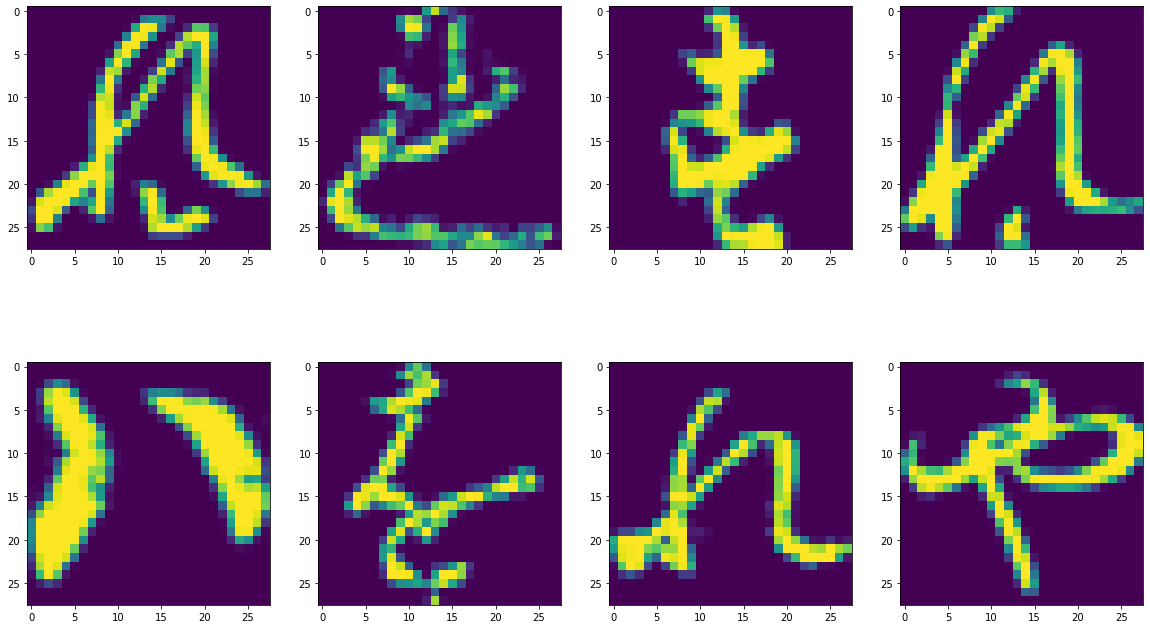

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import BernoulliRBM
import warnings

warnings.filterwarnings('ignore')

kmnist = np.load('kmnist-train-imgs.npz')['arr_0']

np.random.seed(23)

indices = np.random.choice(60000,10000)
X = kmnist[indices]

plt.figure(figsize=(20,12))

plt.subplot(2,4,1)
plt.imshow(X[0].reshape(28,28))

plt.subplot(2,4,2)
plt.imshow(X[1].reshape(28,28))

plt.subplot(2,4,3)
plt.imshow(X[2].reshape(28,28))

plt.subplot(2,4,4)
plt.imshow(X[3].reshape(28,28))

plt.subplot(2,4,5)
plt.imshow(X[4].reshape(28,28))

plt.subplot(2,4,6)
plt.imshow(X[5].reshape(28,28))

plt.subplot(2,4,7)
plt.imshow(X[6].reshape(28,28))

plt.subplot(2,4,8)
plt.imshow(X[7].reshape(28,28))

plt.show()

In [15]:
new_X = [X[i].reshape(28*28) for i in range(X.shape[0])]
new_X = [x/256 for x in new_X]

First example, with 20 components and a learning rate of 0.2:

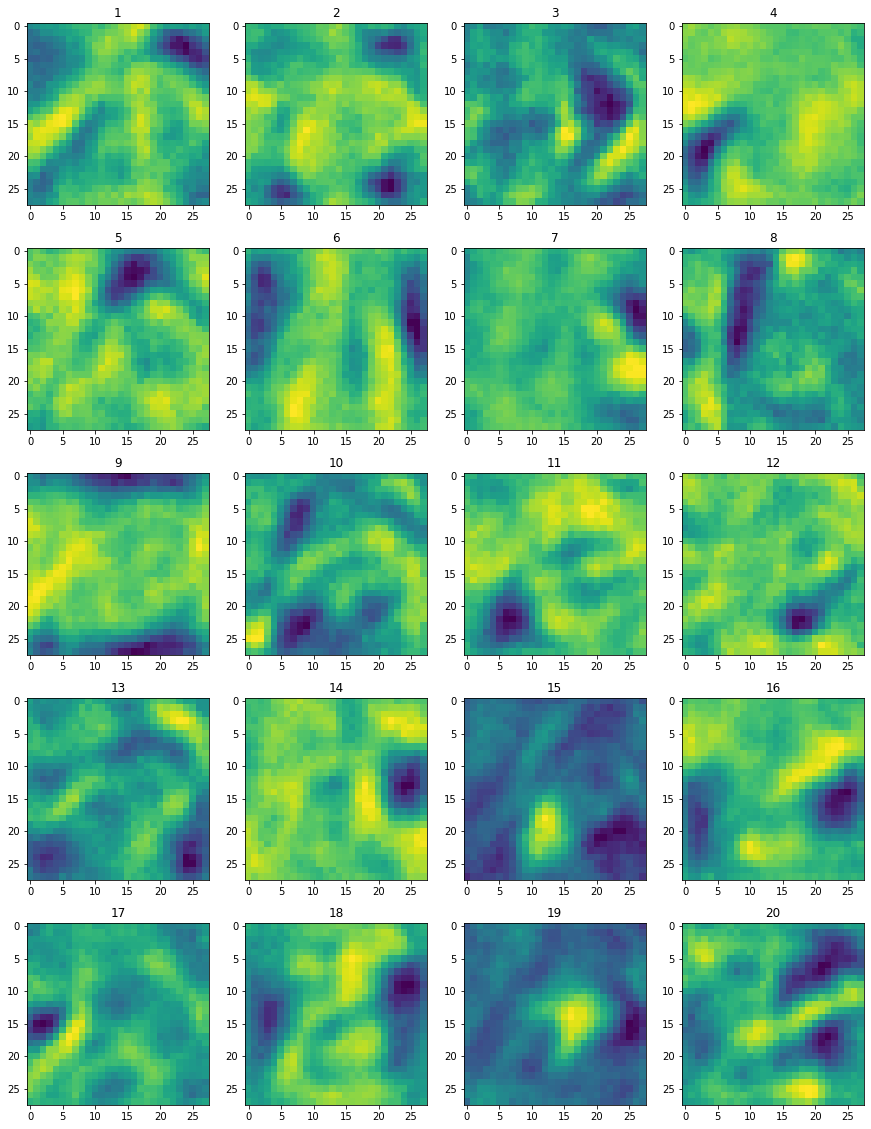

In [16]:
rbm = BernoulliRBM(n_components=20, learning_rate=.2, n_iter=20)

plt.figure(figsize=(15,20))

for i in range(20):
    plt.subplot(5,4,i+1)
    plt.title(str(i+1))
    plt.imshow(rbm.components_[i].reshape(28,28))

plt.show()

100 components, learning rate 0.1:

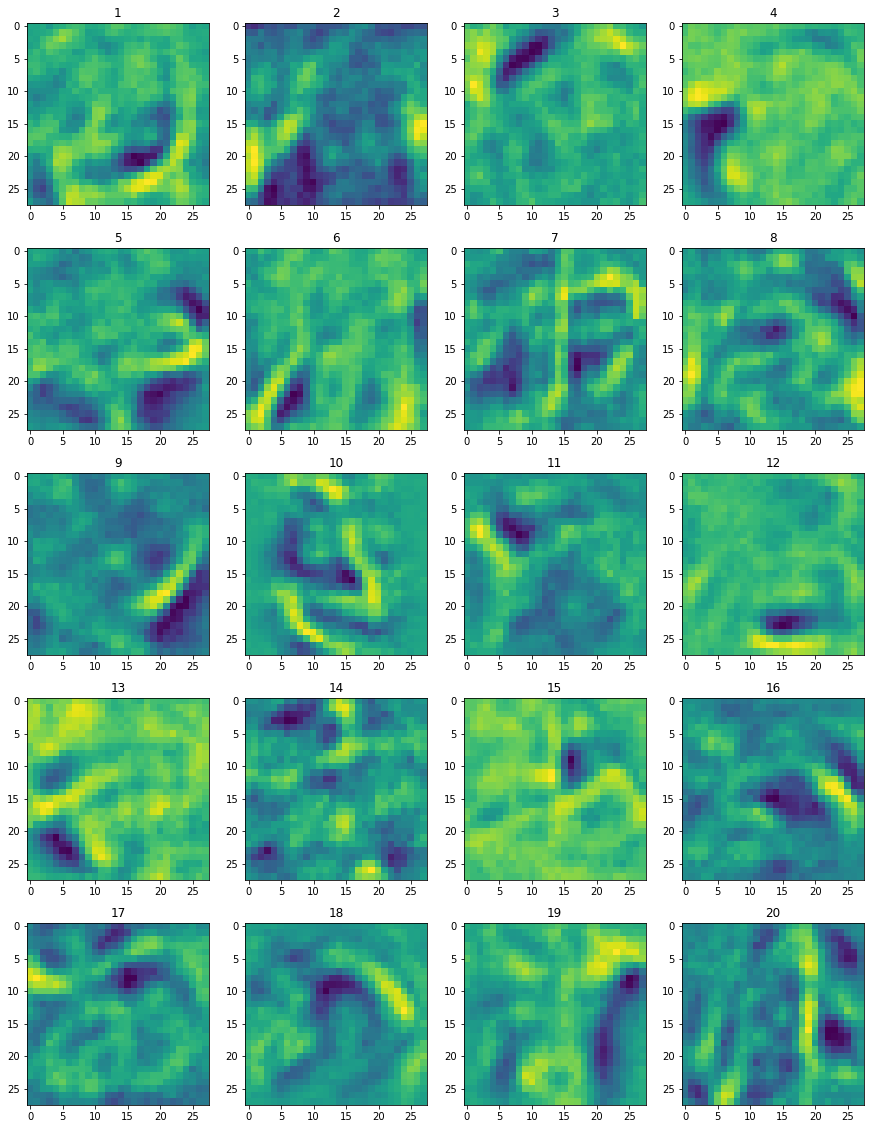

In [17]:
rbm = BernoulliRBM(n_components=100, learning_rate=.1, n_iter=20)

plt.figure(figsize=(15,20))

for i in range(20):
    plt.subplot(5,4,i+1)
    plt.title(str(i+1))
    plt.imshow(rbm.components_[i].reshape(28,28))

plt.show()

300 components, learning rate 0.03

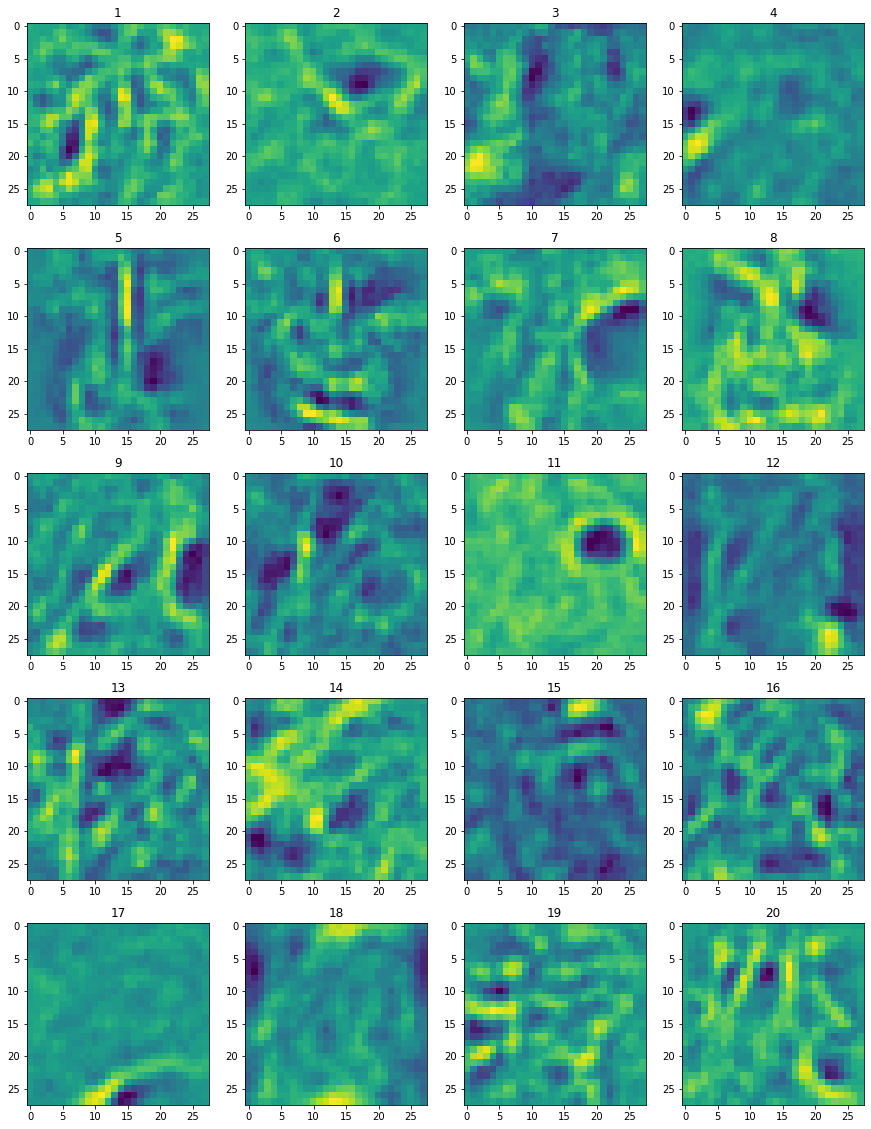

In [18]:
rbm = BernoulliRBM(n_components=300, learning_rate=.03, n_iter=30)

plt.figure(figsize=(15,20))

for i in range(20):
    plt.subplot(5,4,i+1)
    plt.title(str(i+1))
    plt.imshow(rbm.components_[i].reshape(28,28))

plt.show()

In [20]:
from scipy.signal import convolve

def conv_filter(image, filter_matrix):
    output = []
    for y in range(26):
        output.append(np.repeat(0,26))
        for x in range(26):
            output[y][x] =  convolve(image[y:y+3,x:x+3], filter_matrix, mode='valid')
    return np.array(output)

Edge detection filter \#1:

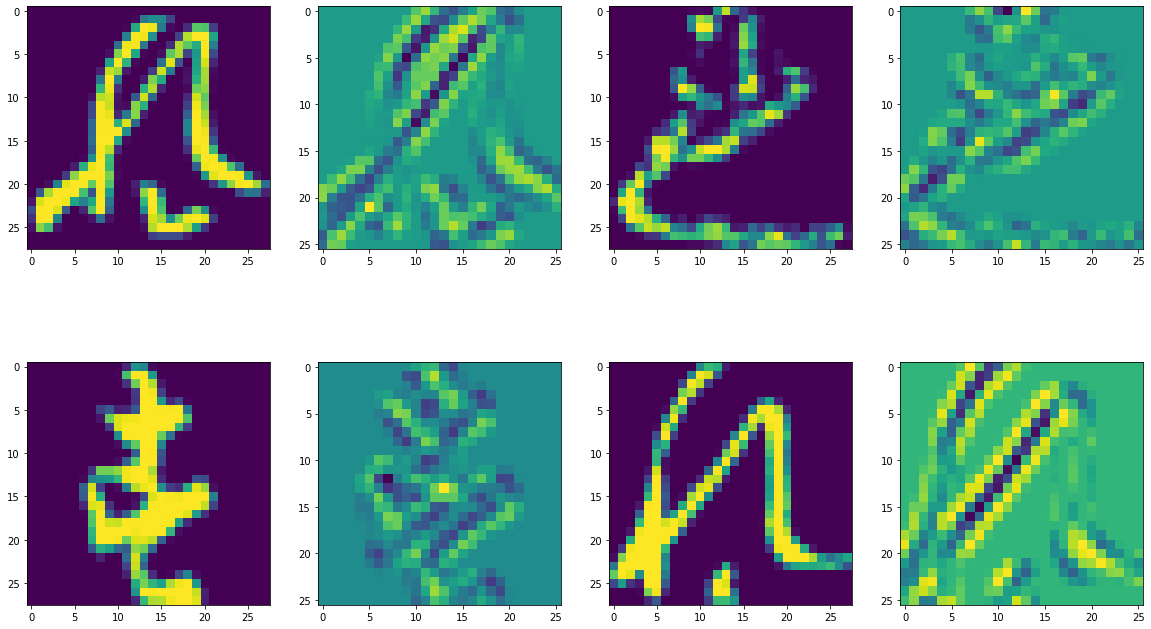

In [21]:
E = np.array([[1,0,-1],
               [0,0,0],
               [-1,0,1]])

plt.figure(figsize=(20,12))

plt.subplot(2,4,1)
plt.imshow(X[0].reshape(28,28))

plt.subplot(2,4,2)
plt.imshow(conv_filter(X[0],E))

plt.subplot(2,4,3)
plt.imshow(X[1].reshape(28,28))

plt.subplot(2,4,4)
plt.imshow(conv_filter(X[1],E))

plt.subplot(2,4,5)
plt.imshow(X[2].reshape(28,28))

plt.subplot(2,4,6)
plt.imshow(conv_filter(X[2],E))

plt.subplot(2,4,7)
plt.imshow(X[3].reshape(28,28))

plt.subplot(2,4,8)
plt.imshow(conv_filter(X[3],E))

plt.show()

Edge detection filter \#2:

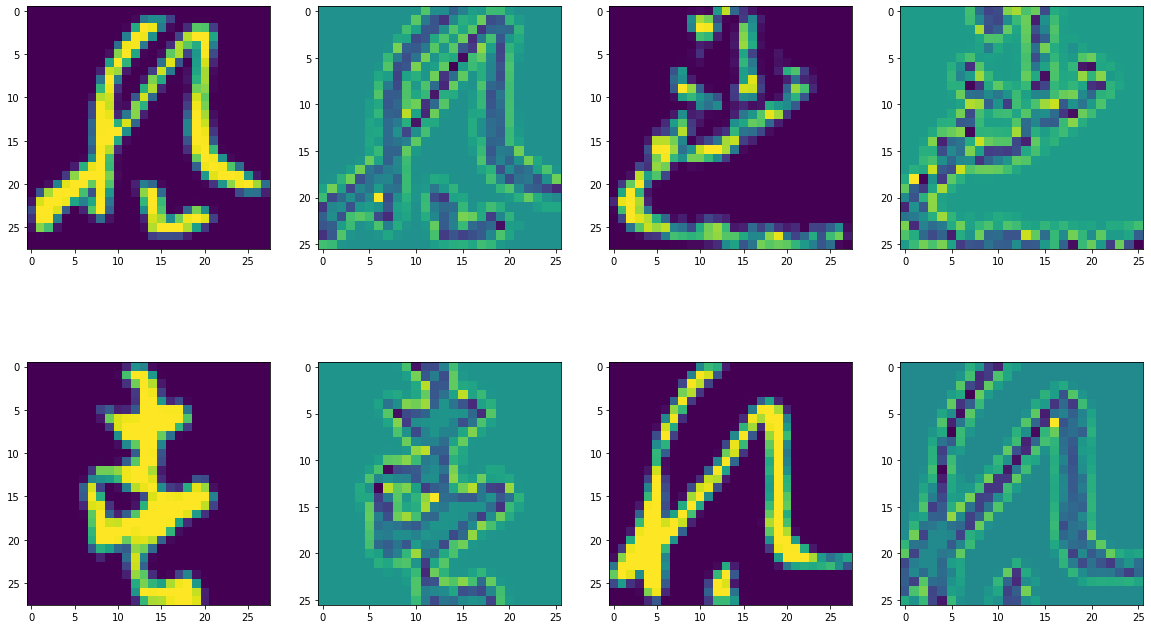

In [22]:
E2 = np.array([[0,1,0],
               [1,-4,1],
               [0,1,0]])

plt.figure(figsize=(20,12))

plt.subplot(2,4,1)
plt.imshow(X[0].reshape(28,28))

plt.subplot(2,4,2)
plt.imshow(conv_filter(X[0],E2))

plt.subplot(2,4,3)
plt.imshow(X[1].reshape(28,28))

plt.subplot(2,4,4)
plt.imshow(conv_filter(X[1],E2))

plt.subplot(2,4,5)
plt.imshow(X[2].reshape(28,28))

plt.subplot(2,4,6)
plt.imshow(conv_filter(X[2],E2))

plt.subplot(2,4,7)
plt.imshow(X[3].reshape(28,28))

plt.subplot(2,4,8)
plt.imshow(conv_filter(X[3],E2))

plt.show()

Edge detection filter \#3:

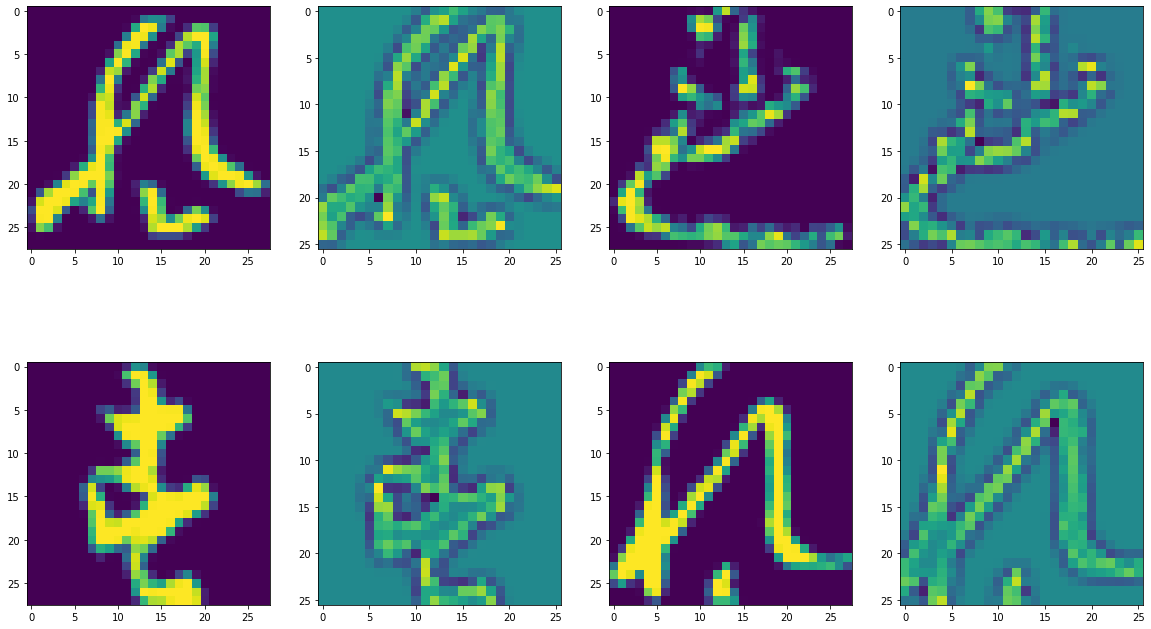

In [23]:
E3 = np.array([[-1,-1,-1],
               [-1,8,-1],
               [-1,-1,-1]])

plt.figure(figsize=(20,12))

plt.subplot(2,4,1)
plt.imshow(X[0].reshape(28,28))

plt.subplot(2,4,2)
plt.imshow(conv_filter(X[0],E3))

plt.subplot(2,4,3)
plt.imshow(X[1].reshape(28,28))

plt.subplot(2,4,4)
plt.imshow(conv_filter(X[1],E3))

plt.subplot(2,4,5)
plt.imshow(X[2].reshape(28,28))

plt.subplot(2,4,6)
plt.imshow(conv_filter(X[2],E3))

plt.subplot(2,4,7)
plt.imshow(X[3].reshape(28,28))

plt.subplot(2,4,8)
plt.imshow(conv_filter(X[3],E3))

plt.show()

Sharpening:

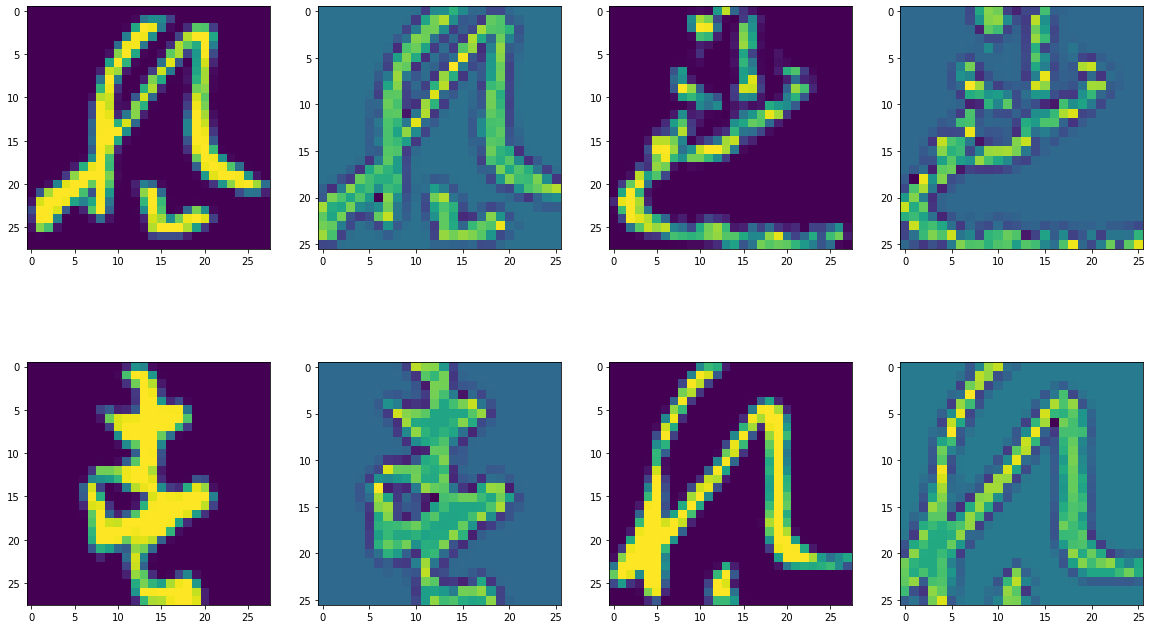

In [24]:
S = np.array([[0,-1,0],
              [-1,5,-1],
              [0,-1,0]])

plt.figure(figsize=(20,12))

plt.subplot(2,4,1)
plt.imshow(X[0].reshape(28,28))

plt.subplot(2,4,2)
plt.imshow(conv_filter(X[0],S))

plt.subplot(2,4,3)
plt.imshow(X[1].reshape(28,28))

plt.subplot(2,4,4)
plt.imshow(conv_filter(X[1],S))

plt.subplot(2,4,5)
plt.imshow(X[2].reshape(28,28))

plt.subplot(2,4,6)
plt.imshow(conv_filter(X[2],S))

plt.subplot(2,4,7)
plt.imshow(X[3].reshape(28,28))

plt.subplot(2,4,8)
plt.imshow(conv_filter(X[3],S))

plt.show()

Blurring:

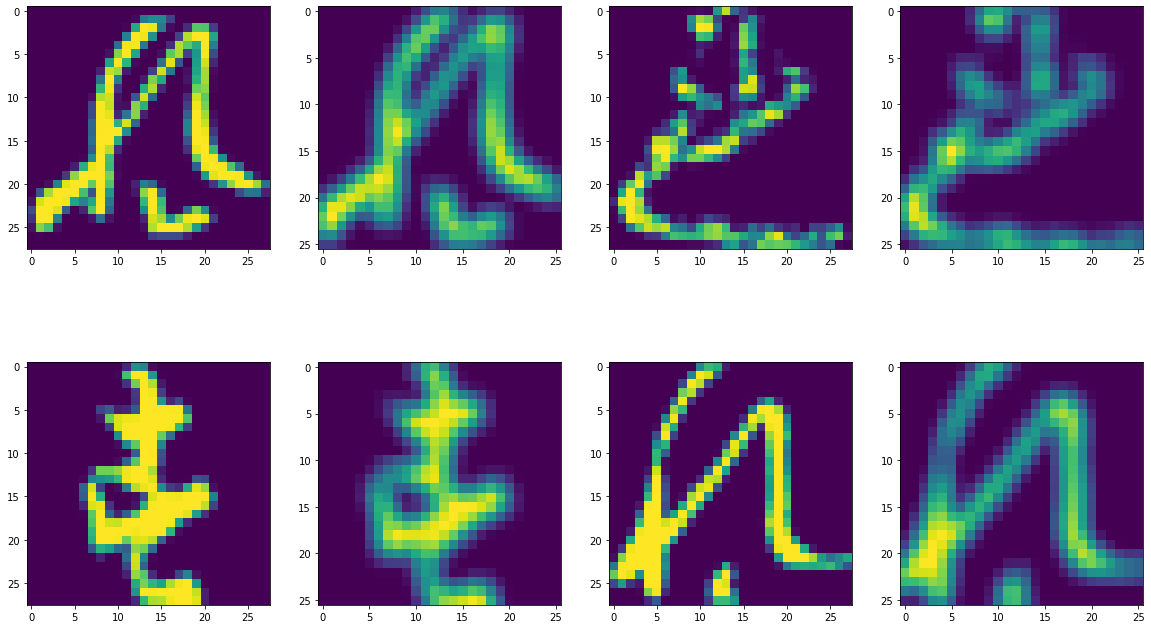

In [25]:
B = np.array([[1,1,1],
              [1,1,1],
              [1,1,1]])/9

plt.figure(figsize=(20,12))

plt.subplot(2,4,1)
plt.imshow(X[0].reshape(28,28))

plt.subplot(2,4,2)
plt.imshow(conv_filter(X[0],B))

plt.subplot(2,4,3)
plt.imshow(X[1].reshape(28,28))

plt.subplot(2,4,4)
plt.imshow(conv_filter(X[1],B))

plt.subplot(2,4,5)
plt.imshow(X[2].reshape(28,28))

plt.subplot(2,4,6)
plt.imshow(conv_filter(X[2],B))

plt.subplot(2,4,7)
plt.imshow(X[3].reshape(28,28))

plt.subplot(2,4,8)
plt.imshow(conv_filter(X[3],B))

plt.show()